<a href="https://colab.research.google.com/github/shadeq2022/Belajar-Pengembangan-Machine-Learning/blob/main/Deployment/Image_Classification_Model_Deployment_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mammals Image Classification**
Nama    : Muhammad Shadeq <br>
Email   : muhammadshadeq25@gmail.com <br>
Dataset : https://www.kaggle.com/datasets/asaniczka/mammals-image-classification-dataset-45-animals

**Import library**

In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications.densenet import DenseNet201,preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Lambda
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import get_file

from google.colab import drive
from google.colab import files
import pathlib

In [2]:
! pip install -q tf-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.3.2 which is incompatible.


**API Kaggle dan Download Dataset**

In [3]:
! pip install kaggle

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/KaggleNew"

In [6]:
%cd /content/

/content


In [7]:
!kaggle datasets download -d asaniczka/mammals-image-classification-dataset-45-animals

 98% 181M/185M [00:02<00:00, 80.4MB/s]
100% 185M/185M [00:02<00:00, 84.8MB/s]


**Lakukan Ekstrak File zip**

In [8]:
local_zip = '/content/mammals-image-classification-dataset-45-animals.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

**Data Directories**

In [9]:
img_dir = '/content/mammals'

**image size and batch size**

In [10]:
image_size = 256
batch_size = 30

**Training data**

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=img_dir,
    validation_split=0.2,
    subset="training",
    seed=1000,
    image_size=(image_size,image_size),
    batch_size=batch_size,
    label_mode='categorical'
)

Found 13751 files belonging to 45 classes.
Using 11001 files for training.


In [12]:
class_names=train_ds.class_names
class_names

['african_elephant',
 'alpaca',
 'american_bison',
 'anteater',
 'arctic_fox',
 'armadillo',
 'baboon',
 'badger',
 'blue_whale',
 'brown_bear',
 'camel',
 'dolphin',
 'giraffe',
 'groundhog',
 'highland_cattle',
 'horse',
 'jackal',
 'kangaroo',
 'koala',
 'manatee',
 'mongoose',
 'mountain_goat',
 'opossum',
 'orangutan',
 'otter',
 'polar_bear',
 'porcupine',
 'red_panda',
 'rhinoceros',
 'sea_lion',
 'seal',
 'snow_leopard',
 'squirrel',
 'sugar_glider',
 'tapir',
 'vampire_bat',
 'vicuna',
 'walrus',
 'warthog',
 'water_buffalo',
 'weasel',
 'wildebeest',
 'wombat',
 'yak',
 'zebra']

**Validation data**

In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=img_dir,
    validation_split=0.2,
    subset="validation",
    seed=1000,
    image_size=(image_size,image_size),
    batch_size=batch_size,
    label_mode='categorical'
)

Found 13751 files belonging to 45 classes.
Using 2750 files for validation.


In [14]:
base_model = DenseNet201(weights = 'imagenet',
                        include_top = False,
                        input_shape=(image_size,image_size,3))
base_model.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


In [15]:
model = Sequential()
model.add(Lambda(preprocess_input,input_shape = (image_size,image_size,3)))
model.add(base_model)
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(45,activation = 'softmax'))

In [16]:
model.compile(optimizer='adam',loss = 'CategoricalCrossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 32)          552992    
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                   

In [17]:
class stop(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.88):
      self.model.stop_training=True
      print("\n Akurasi telah mencapai > 98%!")
callbacks=stop()

In [18]:
epochs = 45
history = model.fit(train_ds,validation_data=val_ds,epochs = epochs , batch_size=30,callbacks=[callbacks])

Epoch 1/45


Cause: Unable to locate the source code of <bound method _BaseOptimizer._update_step_xla of <tensorflow.python.eager.polymorphic_function.tf_method_target.TfMethodTarget object at 0x7dcbaaf345b0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method _BaseOptimizer._update_step_xla of <tensorflow.python.eager.polymorphic_function.tf_method_target.TfMethodTarget object at 0x7dcbaaf345b0>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
367/367 [==============================] - 113s 253ms/step - loss: 1.4505 - accuracy: 0.5990 - val_loss: 0.6509 - val_accuracy: 0.8051
Epoch 2/45
367/367 [==============================] - 78s 212ms/step - loss: 0.4586 - accuracy: 0.8631 - val_loss: 0.5428 - val_accuracy: 0.8520
Epoch 3/45
367/367 [==============================] - 78s 212ms/step - loss: 0.2846 - acc

**Plot accuracy dan error (train dan validation)**

<Axes: >

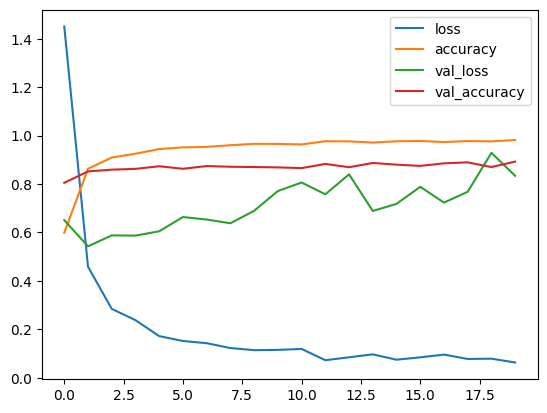

In [19]:
history = pd.DataFrame(model.history.history)
history.plot()

**Deployment**

In [20]:
# Menyimpan model dalam format SavedModel
export_dir = '/gdrive/My Drive/KaggleNew/saved_model/'
tf.saved_model.save(model, export_dir)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

74882212